# Lab 1 - Random data visualisation and sampling

In [15]:
import numpy as np
from typing import Dict, List
from matplotlib import pyplot as plt
import seaborn as sns

### Ex. 2.

In [16]:
n1: int = 1000
n2: int = 10000
rng: np.random.Generator = np.random.default_rng()
data1_uniform: np.ndarray = rng.uniform(size=n1)
data2_normal: np.ndarray = rng.standard_normal(size=n1)
data3_normal_std10: np.ndarray = rng.normal(loc=0.0, scale=10.0, size=n1)
data4_beta: List[np.ndarray] = []
for alfa, beta in [(2, 2), (3, 9)]:  # Skipping (alfa=0, beta=0), because these are invalid parameters
  data4_beta.append(rng.beta(a=alfa, b=beta, size=n1))
data5_2d: List[np.ndarray] = []
for cov in [[[1, 0], [0, 1]], [[2, 1], [1, 2]]]:
  data5_2d.append(rng.multivariate_normal(mean=[0, 0], cov=cov, size=n2))

### Ex. 3.

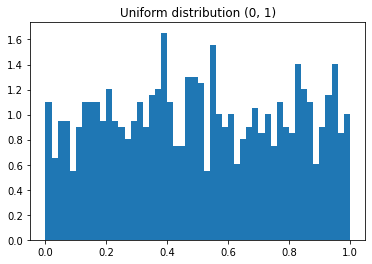

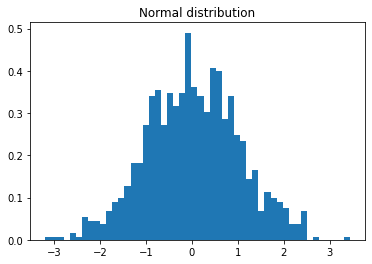

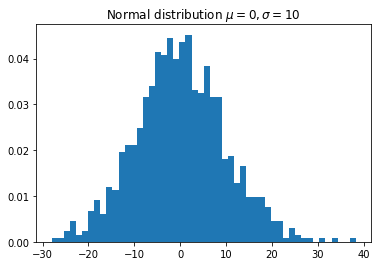

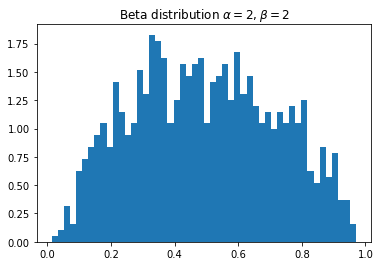

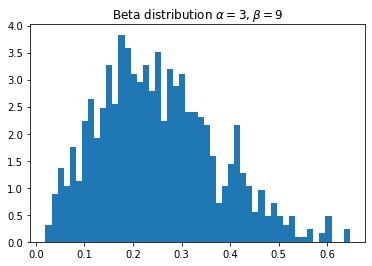

In [17]:
def histogram(samples: np.ndarray, title: str):
  plt.figure()
  plt.hist(samples, bins=50, density=True)
  plt.title(title)
  plt.show()

samples_1d_with_titles: Dict[str, np.ndarray] = {
    r"Uniform distribution (0, 1)": data1_uniform,
    r"Normal distribution": data2_normal,
    r"Normal distribution $\mu=0, \sigma=10$": data3_normal_std10,
    r"Beta distribution $\alpha=2, \beta=2$": data4_beta[0],
    r"Beta distribution $\alpha=3, \beta=9$": data4_beta[1]
}

for title, samples in samples_1d_with_titles.items():
  histogram(samples, title)

Histograms are similar to the plots  of their corresponding distributions.

### Ex. 4.

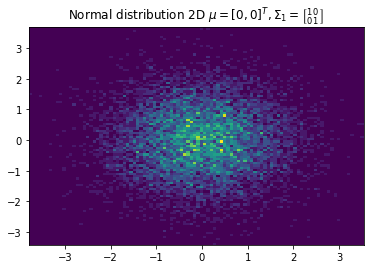

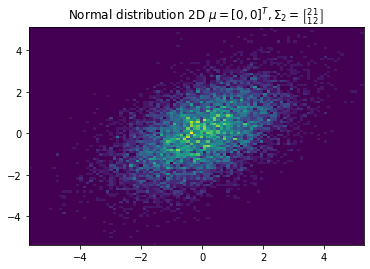

In [18]:
samples_2d_with_titles: Dict[str, np.ndarray] = {
    r"Normal distribution 2D $\mu = [0,0]^{T}, \Sigma_{1} = \left[\genfrac{}{}{0}{}{1}{0}\genfrac{}{}{0}{}{0}{1}\right]$": data5_2d[0],
    r"Normal distribution 2D $\mu = [0,0]^{T}, \Sigma_{2} = \left[\genfrac{}{}{0}{}{2}{1}\genfrac{}{}{0}{}{1}{2}\right]$": data5_2d[1]
}
for title, samples in samples_2d_with_titles.items():
  plt.figure()
  plt.hist2d(samples[:, 0], samples[:, 1], bins=100)
  plt.title(title)
  plt.show()

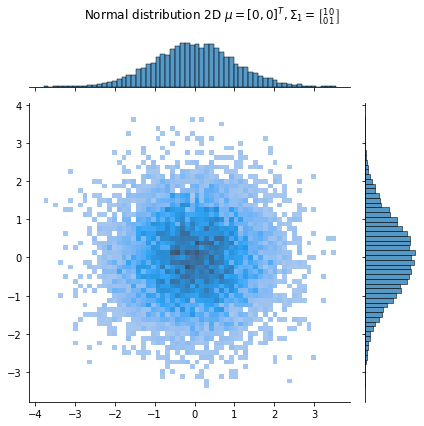

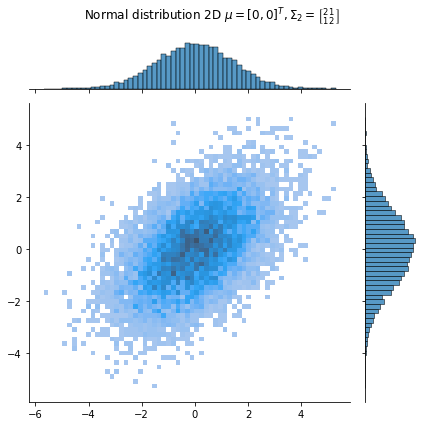

In [19]:
for title, samples in samples_2d_with_titles.items():
  p: sns.JointGrid = sns.jointplot(data=samples, x=samples[:, 0], y=samples[:, 1], kind="hist")
  plt.suptitle(title)
  plt.tight_layout()

2-D Histograms present the distributions properly.

### Ex. 5.

In [20]:
y_all: List[float] = []
alfa: np.ndarray = rng.normal(loc=2.0, scale=0.1, size=n1)  # n1 = 1000
beta: np.ndarray = rng.normal(loc=0.2, scale=0.2, size=n1)
x: np.ndarray = rng.normal(loc=0.0, scale=3.0, size=n1)
sigma: np.ndarray = np.abs(rng.standard_normal(size=n1))
mu: np.ndarray = alfa + beta * x
for i in range(n1):
  y_all.append(rng.normal(loc=mu[i], scale=sigma[i]))
y = np.array(y_all)

### Ex. 6.

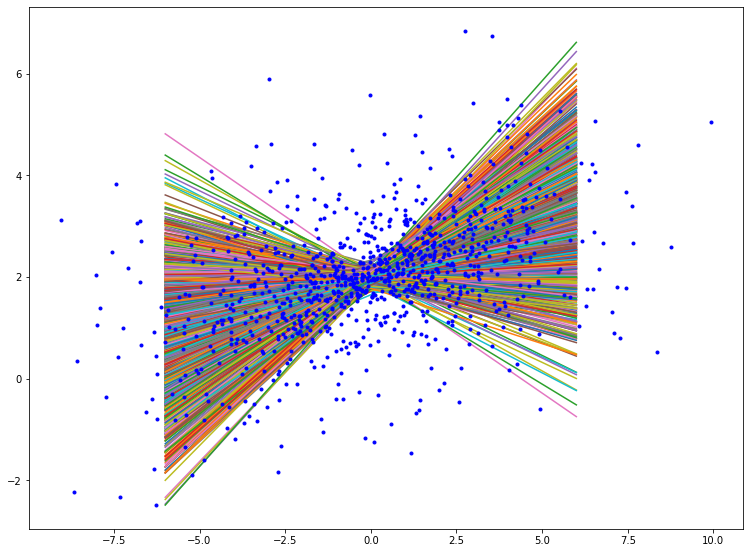

In [21]:
plt.figure(figsize=(12.8,9.6))
x_new: np.ndarray = np.linspace(start=-6, stop=6, num=1000)
for i in range(n1):
  y_new: np.ndarray = x_new * beta[i] + alfa[i]
  plt.plot(x_new, y_new)
plt.plot(x, y, "b.")
plt.show()